In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
results_backbone = pd.read_csv('../data/results_backbone.csv')
results_summary = pd.read_csv('../data/results_summary.csv')
detailed_results = pd.read_csv('../data/detailed_results.csv')

In [3]:
# Filter the modularity value without any filters
modularity_no_filter = detailed_results[
    (detailed_results['Polarization Lower Bound (%)'] == 0) &
    (detailed_results['Polarization Upper Bound (%)'] == 100) &
    (detailed_results['Pruning Percentage (%)'] == 0)
][['Year', 'Modularity']]
modularity_no_filter = modularity_no_filter.rename(columns={'Modularity': 'Modularity_No_Filter'})

In [4]:
# Selects the backbone extraction modularity value
modularity_backbone = results_backbone[['Year', 'Modularity']]
modularity_backbone = modularity_backbone.rename(columns={'Modularity': 'Modularity_Backbone'})

# Selects the modularity value of the author's methodology
modularity_custom_method = results_summary[['Year', 'Modularity']]
modularity_custom_method = modularity_custom_method.rename(columns={'Modularity': 'Modularity_Authors_Method'})

# Merges the three datasets to align years
modularity_comparison = pd.merge(modularity_no_filter, modularity_backbone, on='Year', how='outer')
modularity_comparison = pd.merge(modularity_comparison, modularity_custom_method, on='Year', how='outer')

# Filters the years from 2004 to 2023
modularity_comparison = modularity_comparison[(modularity_comparison['Year'] >= 2004) & (modularity_comparison['Year'] <= 2023)]

# Order the years to ensure correct visualization on the chart
modularity_comparison = modularity_comparison.sort_values(by='Year')

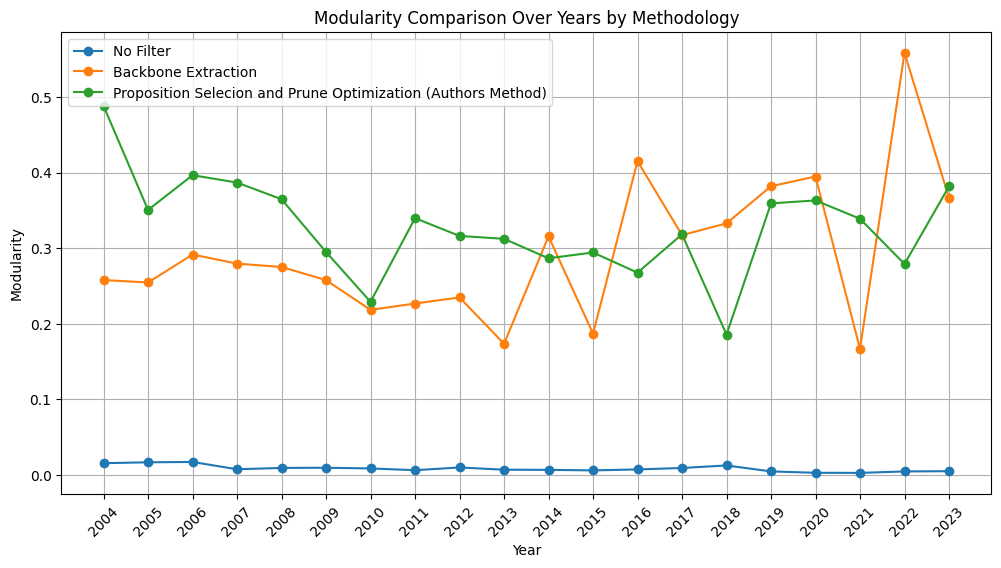

In [5]:
# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(modularity_comparison['Year'], modularity_comparison['Modularity_No_Filter'], label='No Filter', marker='o')
plt.plot(modularity_comparison['Year'], modularity_comparison['Modularity_Backbone'], label='Backbone Extraction', marker='o')
plt.plot(modularity_comparison['Year'], modularity_comparison['Modularity_Authors_Method'], label="Proposition Selecion and Prune Optimization (Authors Method)", marker='o')

# X-axis adjustment to display entire years
plt.xticks(modularity_comparison['Year'], rotation=45)  # Gira os rótulos para evitar sobreposição

# Chart Settings
plt.xlabel('Year')
plt.ylabel('Modularity')
plt.title('Modularity Comparison Over Years by Methodology')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Calculation of metrics
metrics = {}

for method in ['Modularity_No_Filter', 'Modularity_Backbone', 'Modularity_Authors_Method']:
    modularity_values = modularity_comparison[method]
    
    metrics[method] = {
        'Mean': modularity_values.mean(),
        'Standard Deviation': modularity_values.std(),
        'Max': modularity_values.max(),
        'Min': modularity_values.min()
    }

# Annual Comparison (Relative Advantage)
best_method_counts = modularity_comparison[['Modularity_No_Filter', 'Modularity_Backbone', 'Modularity_Authors_Method']].idxmax(axis=1).value_counts()
for method in metrics.keys():
    metrics[method]['Years as Best Method'] = best_method_counts.get(method, 0)

# Improvement Index compared to "No Filter"
no_filter_mean = metrics['Modularity_No_Filter']['Mean']
for method in ['Modularity_Backbone', 'Modularity_Authors_Method']:
    metrics[method]['Improvement Index (%)'] = ((metrics[method]['Mean'] - no_filter_mean) / no_filter_mean) * 100

# View results
metrics_df = pd.DataFrame(metrics).T
metrics_df

,Mean,Standard Deviation,Max,Min,Years as Best Method,Improvement Index (%)
Modularity_No_Filter,0.008720,0.004224,0.017445,0.002980,0.0,NaN
Modularity_Backbone,0.295307,0.094725,0.558089,0.166953,6.0,3286.397824
Modularity_Authors_Method,0.327653,0.065441,0.488004,0.185847,14.0,3657.322660


In [7]:
# Calculates the Improvement Index of the Authors Method in relation to Backbone Extraction
improvement_index_authors_vs_backbone = ((metrics_df.loc['Modularity_Authors_Method', 'Mean'] - metrics_df.loc['Modularity_Backbone', 'Mean']) / metrics_df.loc['Modularity_Backbone', 'Mean']) * 100

# Updates the table by removing the current Improvement Index column and adding the new value for Authors Method only
metrics_df = metrics_df.drop(columns=['Improvement Index (%)'])
metrics_df.loc['Modularity_Authors_Method', 'Improvement Index vs Backbone (%)'] = improvement_index_authors_vs_backbone

# Display the updated DataFrame
metrics_df

,Mean,Standard Deviation,Max,Min,Years as Best Method,Improvement Index vs Backbone (%)
Modularity_No_Filter,0.008720,0.004224,0.017445,0.002980,0.0,NaN
Modularity_Backbone,0.295307,0.094725,0.558089,0.166953,6.0,NaN
Modularity_Authors_Method,0.327653,0.065441,0.488004,0.185847,14.0,10.953375


In [8]:
# Extract values ​​from the metrics_df DataFrame
mean_backbone = metrics_df.loc['Modularity_Backbone', 'Mean']
mean_authors = metrics_df.loc['Modularity_Authors_Method', 'Mean']
std_backbone = metrics_df.loc['Modularity_Backbone', 'Standard Deviation']
std_authors = metrics_df.loc['Modularity_Authors_Method', 'Standard Deviation']
years_best_backbone = metrics_df.loc['Modularity_Backbone', 'Years as Best Method']
years_best_authors = metrics_df.loc['Modularity_Authors_Method', 'Years as Best Method']

# Improvement calculations
improvement_mean = ((mean_authors - mean_backbone) / mean_backbone) * 100
improvement_std_dev = ((std_backbone - std_authors) / std_backbone) * 100
improvement_years_best = ((years_best_authors - years_best_backbone) / years_best_backbone) * 100

# Display results with formatting
print(f"Percentage of Improvement in Modularity Mean: {improvement_mean:.2f}%")
print(f"Relative Difference in Standard Deviation: {improvement_std_dev:.2f}%")
print(f"Difference in Number of Years as Best Method: {improvement_years_best:.2f}%")


Percentage of Improvement in Modularity Mean: 10.95%
Relative Difference in Standard Deviation: 30.91%
Difference in Number of Years as Best Method: 133.33%


- **Percentage of Improvement in Average Modularity**: 10.95%
  - This means that the **Authors Method** had an average modularity approximately 10.95% higher than the **Backbone Extraction**.
  
- **Relative Difference in Standard Deviation**: 30.91%
  - The standard deviation of the **Authors Method** is approximately 30.91% smaller, indicating that it is more consistent than **Backbone Extraction**.
  
- **Difference in Number of Years as Best Method**: 133.33%
  - The **Authors Method** was the best method in 133.33% more years than **Backbone Extraction**, indicating a significant lead over the years.
